**TM10007 Machine Learning**

## Import dependencies and data

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import shutil
import subprocess
import shutil
import os
import stat
from os import path

from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

## if data.csv is not present download it from github
if not os.path.isfile("ecg_data.csv"):
    ## clone repo from githun
    if not os.path.isdir("tm10007_ml"):
        !git clone https://github.com/jveenland/tm10007_ml.git
    ## extract zip file
    if not os.path.isfile("tm10007_ml/ecg/ecg_data.csv"):
        with zipfile.ZipFile('tm10007_ml/ecg/ecg_data.zip', 'r') as zip_ref:
            zip_ref.extractall('tm10007_ml/ecg')
    ## move data file to root folder
    shutil.move('tm10007_ml/ecg/ecg_data.csv', 'ecg_data.csv')

    ## Delete cloned repo
    for root, dirs, files in os.walk("./tm10007_ml"):  
        for dir in dirs:
            os.chmod(path.join(root, dir), stat.S_IRWXU)
        for file in files:
            os.chmod(path.join(root, file), stat.S_IRWXU)
    shutil.rmtree('./tm10007_ml')

data = pd.read_csv('ecg_data.csv', index_col=0)

Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 83 (delta 13), reused 12 (delta 12), pack-reused 64
Unpacking objects: 100% (83/83), 67.93 MiB | 7.18 MiB/s, done.


## Split data into test and train data

In [2]:
x_train, x_test = model_selection.train_test_split(data, test_size=0.2)

ECG_ABNORMAL = data[data['label'] == 1]
ECG_NORMAL = data[data['label'] == 0]

x_train_abnormal, x_test_abnormal = model_selection.train_test_split(ECG_ABNORMAL, test_size=0.2)
x_train_normal, x_test_normal = model_selection.train_test_split(ECG_NORMAL,test_size = 0.2)

train_set = pd.concat([x_train_normal,x_train_abnormal])
test_set = pd.concat([x_test_normal,x_test_abnormal])


## Scale features of train and test set

In [3]:
# scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
# fit the scaler on the train set
scaler.fit(train_set)
# transform both train and test data set with the scaler
# rename the column names to the ones from 'data' again
train_set_scaled = pd.DataFrame(scaler.transform(train_set))
train_set_scaled.columns=data.columns.values
test_set_scaled = pd.DataFrame(scaler.transform(test_set))
test_set_scaled.columns=data.columns.values

## Select best features

In [ ]:
# Extract the features and labels
y = train_set['label']
X = train_set.drop(['label'], axis=1)

# Select the k best features using the chi-squared test
selector = SelectKBest(chi2, k=33)
X_new = selector.fit_transform(X, y)

# Print the indices of the selected features
print(f'The k best features are {selector.get_support(indices=True)}')
scores = pd.DataFrame(selector.scores_)
sorted_scores = scores.sort_values(scores.columns[0],ascending=False)

threshold = 3500
below_threshold_to_nan = sorted_scores[sorted_scores > threshold]
above_threshold = below_threshold_to_nan.dropna()
print(above_threshold)
number_above_threshold = len(above_threshold)

label_1 = train_set_scaled.columns[6750]
print(label_1)


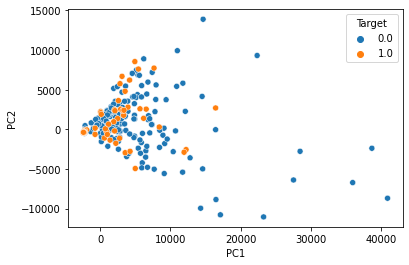

[0.59007038 0.10267812]
       0         1         2         3         4         5         6     \
0  0.125263  0.014951  0.005820  0.002962  0.001798  0.001145  0.000922   
1 -0.032241 -0.002466  0.000842 -0.000532 -0.000621 -0.000598 -0.002379   

       7         8         9     ...      8990      8991      8992      8993  \
0  0.000511  0.000571  0.000806  ...  0.000013  0.000013  0.000014  0.000013   
1 -0.000017  0.000268 -0.000295  ...  0.000043  0.000043  0.000045  0.000047   

       8994      8995      8996      8997      8998      8999  
0  0.000013  0.000012  0.000013  0.000014  0.000013  0.000013  
1  0.000043  0.000040  0.000044  0.000047  0.000046  0.000043  

[2 rows x 9000 columns]


In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

X = train_set_scaled.iloc[:, :-1].values
y = train_set_scaled.iloc[:, -1].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_pca)
plt.show()

print(pca.explained_variance_ratio_)

loadings = pd.DataFrame(pca.components_)
max_loading = loadings.max().max()
sorted_loadings = loadings.sort_values(loadings.columns[1],ascending=False)
print(sorted_loadings)